# Try out multiple clustering algorithms
We do not know if and how many outliers or abnormal observations there are. Therefore, we should mostly try out unsupervised methods that do not need a parameter that specifies the fraction of outliers.

## Query data from the DB

In [1]:
import pandas as pd

In [2]:
import sqlite3

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

conn = create_connection(r'C:\Users\rouma\Documents\BlueRock\TraceDB.db')
cur = conn.cursor()


In [3]:
# df = pd.read_sql_query('''
# SELECT gpsAt, lat, lon, speed, DeviceName, DistanceFromArrival, t.TraceID, Duration, PlannedDuration, AddrStart, AddrEnd, TraceNo, TimeDifference, Anomaly
# FROM Trace_A17501 t
#     INNER JOIN A17501_Info i ON t.TraceID=i.TraceID
# WHERE DeviceName == 'A10160' and t.TraceID = '5255375_1'
#  ''', conn)
# df

df = pd.read_sql_query(''' Select * from Trace_A17501 Where TraceID == '5174539_1' ''', conn)
df

# df= pd.read_sql_query('''SELECT distinct traceID from Trace_A17501 where DeviceName = 'A21419' ''', conn)
# df

# df = pd.read_sql_query(''' SELECT distinct TraceID, TraceNo, PlannedDuration, Duration FROM A17501_Info WHERE PlannedDuration > 120 ''', conn)
# df

,alt,batPct,gpsAt,heading,lat,lon,speed,DeviceName,TraceID,DistanceFromArrival
0,0,92,2021-11-11 07:39:14,82,49.1934,-123.1478,57,A10165,5174539_1,257.779110
1,-7,93,2021-11-11 07:39:55,108,49.1923,-123.1388,59,A10165,5174539_1,257.360461
2,-14,92,2021-11-11 07:40:37,84,49.1910,-123.1307,3,A10165,5174539_1,257.006922
3,12,93,2021-11-11 07:42:08,84,49.1909,-123.1256,28,A10165,5174539_1,256.732749
4,-9,92,2021-11-11 07:43:14,88,49.1909,-123.1217,58,A10165,5174539_1,256.517698
...,...,...,...,...,...,...,...,...,...,...
1025,525,100,2021-11-11 13:08:33,188,50.6631,-120.3560,26,A10165,5174539_1,0.358940
1026,535,100,2021-11-11 13:08:40,230,50.6626,-120.3565,38,A10165,5174539_1,0.308275
1027,545,100,2021-11-11 13:08:46,244,50.6623,-120.3572,40,A10165,5174539_1,0.253072
1028,529,100,2021-11-11 13:09:55,260,50.6616,-120.3597,0,A10165,5174539_1,0.081485


In [4]:
df['gpsAt'] = pd.to_datetime(df['gpsAt'])
df['gpsAt'] = df['gpsAt'].dt.tz_localize(None)

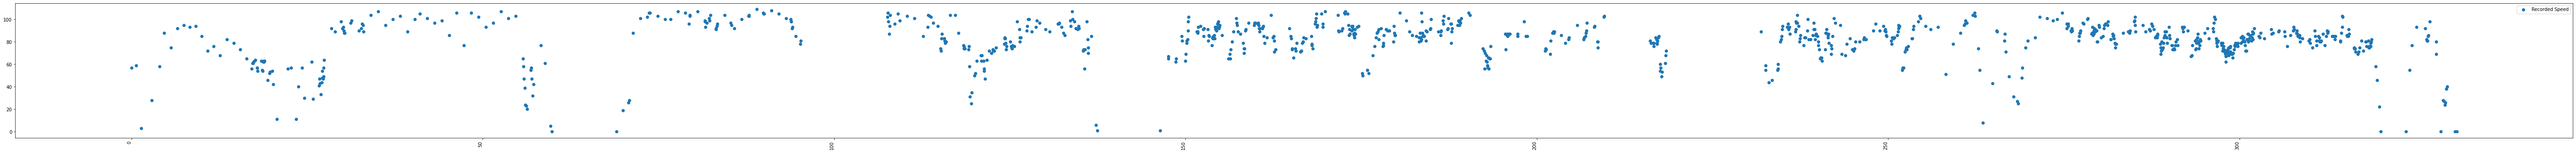

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


from matplotlib.pyplot import figure

## Get the minutes since the trace has started ##
minDiff = [(t2 - df['gpsAt'][0]).total_seconds() / 60 for t2 in df['gpsAt']]
df['minDiff'] = minDiff

fig, ax = plt.subplots(1)
fig.autofmt_xdate()

plt.xticks(rotation=90)
plt.scatter(df['minDiff'], df['speed'], label = 'Recorded Speed')
#plt.scatter(dates, df['avgSpeed'], label = 'Calculated Speed')

xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
#ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=300))
#ax.xaxis.set_major_locator(mdates.HourLocator(byhour=[0,3]))



#ax.xaxis.set_major_formatter(xfmt)
plt.rcParams["figure.figsize"] = (100,6)

plt.legend(loc="upper right")
#plt.xlim(datetime(2021,11,24,4,10,0), datetime(2021,11,24,4,50,0) )
#plt.xlim(startDt, endDt)
plt.savefig('Plot.png')

# Clustering algorithms

# Pycaret
Drawback - need to specify a ratio of outlying observations. Questionable assumption that does not hold in our case.
Need to find methods that do not need such a parameter. 

In [10]:
from pycaret.anomaly import *
s = setup(df,normalize = True, session_id = 123)
s

ModuleNotFoundError: No module named 'pycaret'

In [8]:
iforest = create_model('iforest', fraction = 0.2)
iforest_results = assign_model(iforest)
iforest_results.head()
iforest_results[iforest_results['Anomaly'] == 1]
dfResult = iforest_results
dfResult

,alt,batPct,gpsAt,heading,lat,lon,speed,DeviceName,TraceID,DistanceFromArrival,minDiff,Anomaly,Anomaly_Score
0,0,92,2021-11-11 07:39:14,82,49.1934,-123.1478,57,A10165,5174539_1,257.779110,0.000000,1,0.162966
1,-7,93,2021-11-11 07:39:55,108,49.1923,-123.1388,59,A10165,5174539_1,257.360461,0.683333,1,0.142496
2,-14,92,2021-11-11 07:40:37,84,49.1910,-123.1307,3,A10165,5174539_1,257.006922,1.383333,1,0.183890
3,12,93,2021-11-11 07:42:08,84,49.1909,-123.1256,28,A10165,5174539_1,256.732749,2.900000,1,0.140685
4,-9,92,2021-11-11 07:43:14,88,49.1909,-123.1217,58,A10165,5174539_1,256.517698,4.000000,1,0.162307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,525,100,2021-11-11 13:08:33,188,50.6631,-120.3560,26,A10165,5174539_1,0.358940,329.316667,1,0.110300
1026,535,100,2021-11-11 13:08:40,230,50.6626,-120.3565,38,A10165,5174539_1,0.308275,329.433333,1,0.107591
1027,545,100,2021-11-11 13:08:46,244,50.6623,-120.3572,40,A10165,5174539_1,0.253072,329.533333,1,0.109148
1028,529,100,2021-11-11 13:09:55,260,50.6616,-120.3597,0,A10165,5174539_1,0.081485,330.683333,1,0.147316


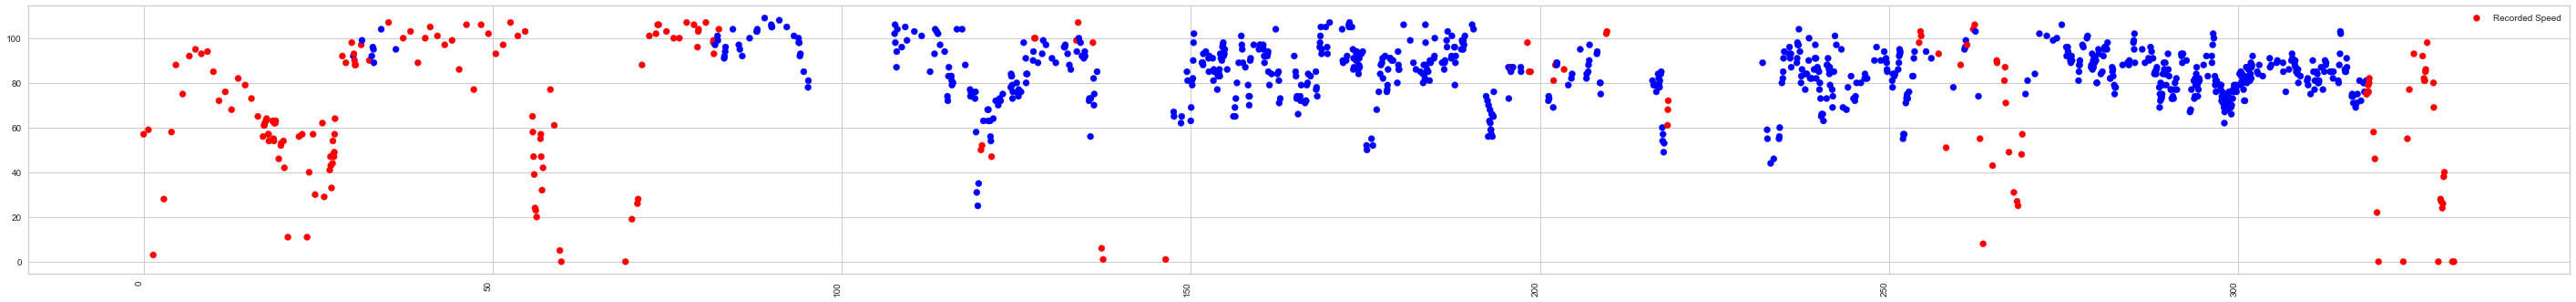

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


from matplotlib.pyplot import figure


fig, ax = plt.subplots(1)
fig.autofmt_xdate()

cols = []
for a in dfResult['Anomaly'].to_list():
    if a == 1:
        cols.append('red')
    else:
        cols.append('blue')

plt.xticks(rotation=90)
plt.scatter(dfResult['minDiff'], dfResult['speed'], label = 'Recorded Speed', c = cols)
plt.gray()

#plt.scatter(dates, df['avgSpeed'], label = 'Calculated Speed')

#xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
# ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
#ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
#ax.xaxis.set_major_formatter(xfmt)
plt.rcParams["figure.figsize"] = (50,6)

plt.legend(loc="upper right")
#plt.xlim(datetime(2021,7,12,18,0,0), datetime(2021,7,13,4,0,0) )

plt.savefig('Plot.png')

In [7]:
# dfSubset[dfSubset['Anomaly'] == 1]
import plotly.io as pio
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

dfSubset = df[['minDiff', 'speed']]
np_array = df[["minDiff", "speed"]].to_numpy()
np_array = StandardScaler().fit_transform(np_array)

def plot_cluster(X, y, title="Cluster plot"):
    fig = X.plot.scatter(x='minDiff', y='speed', color=y)
    fig.update_layout(autosize=False, width=1500, height=500,
                  coloraxis = dict(showscale=False, colorscale='Portland'),
                  font=dict(size=18),
                  title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=10))
    return fig

pd.options.plotting.backend = 'plotly'
pio.renderers.default = "notebook_connected"
clustering = DBSCAN(eps=0.15, min_samples=5).fit(np_array[1:])
pred = clustering.labels_

fig = plot_cluster(dfSubset[1:], pred, title="Continuous Only")
fig

## Gaussian Mixture Model

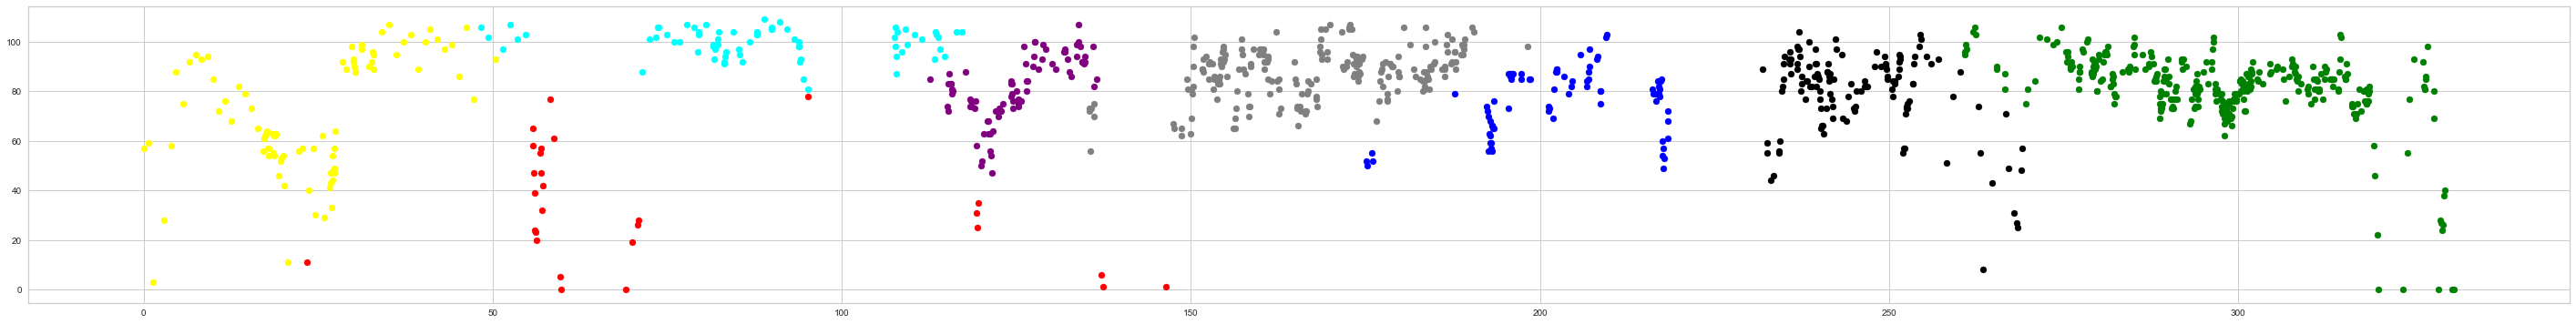

In [123]:
from sklearn.mixture import GaussianMixture

dfSubset = df[['minDiff', 'speed']]
gmm = GaussianMixture(n_components=8)
gmm.fit(dfSubset)

#predictions from gmm
labels = gmm.predict(dfSubset)
frame = pd.DataFrame(dfSubset)
frame['cluster'] = labels
frame.columns = ['minDiff', 'speed', 'cluster']

color=['blue','green','cyan', 'black', 'red', 'yellow', 'gray', 'purple']
for k in range(0,8):
    dfSubset = frame[frame["cluster"]==k]
    plt.scatter(dfSubset["minDiff"],dfSubset["speed"],c=color[k])
plt.show()

### FbProphet ARIMA

In [51]:
from fbprophet import Prophet
import altair as alt

dfSubset = df[['gpsAt', 'speed']]
dfSubset.rename({'gpsAt': 'ds', 'speed': 'y'}, axis=1, inplace = True)  # new method

def fit_predict_model(dfSubset, interval_width = 0.7, changepoint_range = 0.9):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'additive', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dfSubset)
    forecast = m.predict(dfSubset)
    forecast['fact'] = dfSubset['y'].reset_index(drop = True)
    return forecast
    
pred = fit_predict_model(dfSubset)
#dfSubset

C:\Users\rouma\Anaconda3\envs\AnomalyDetectionEnv\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted

pred = detect_anomalies(pred)

In [53]:

def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='Sales'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='Sales'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
        #,size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)
              
plot_anomalies(pred)

alt.LayerChart(...)

In [59]:
result = pred
result['gpsAt'] = pd.to_datetime(result['ds'])
result['gpsAt'] = result['gpsAt'].dt.tz_localize(None)

minDiff = [(t2 - result['gpsAt'][0]).total_seconds() / 60 for t2 in result['gpsAt']]
result['minDiff'] = minDiff

timeBetweenRecordings = [(time2 - time1)  for time1, time2 in zip(result['minDiff'].shift(1), result['minDiff'])]
result['TimeBetweenRecordings']= timeBetweenRecordings
result

,ds,trend,yhat,yhat_lower,yhat_upper,fact,anomaly,importance,gpsAt,minDiff,TimeBetweenRecordings
0,2021-11-11 07:39:14,65.914403,65.914403,47.050022,84.077485,57,0,0.000000,2021-11-11 07:39:14,0.000000,NaN
1,2021-11-11 07:39:55,66.039834,66.039834,49.375015,86.759296,59,0,0.000000,2021-11-11 07:39:55,0.683333,0.683333
2,2021-11-11 07:40:37,66.168325,66.168325,49.698718,85.314856,3,-1,15.566239,2021-11-11 07:40:37,1.383333,0.700000
3,2021-11-11 07:42:08,66.446722,66.446722,49.314005,85.337259,28,-1,0.761214,2021-11-11 07:42:08,2.900000,1.516667
4,2021-11-11 07:43:14,66.648637,66.648637,48.503560,83.954009,58,0,0.000000,2021-11-11 07:43:14,4.000000,1.100000
...,...,...,...,...,...,...,...,...,...,...,...
1025,2021-11-11 13:08:33,75.864452,75.864452,58.889707,95.438339,26,-1,1.264989,2021-11-11 13:08:33,329.316667,0.083333
1026,2021-11-11 13:08:40,75.850576,75.850576,57.848165,93.329370,38,-1,0.522320,2021-11-11 13:08:40,329.433333,0.116667
1027,2021-11-11 13:08:46,75.838683,75.838683,59.176456,94.350489,40,-1,0.479411,2021-11-11 13:08:46,329.533333,0.100000
1028,2021-11-11 13:09:55,75.701910,75.701910,56.839475,93.316608,0,-1,inf,2021-11-11 13:09:55,330.683333,1.150000


In [77]:
subsequences = []
currentSubsequence = []
durationOfSubsequence = 0
for i in result[['TimeBetweenRecordings', 'anomaly']].itertuples():

    #Flush current list if the subsequence gets interrupted by regular or overly fast values
    if (i[2] == 0) or (i[2] == 1):
        if durationOfSubsequence >= 10:
            subsequences.append([currentSubsequence, durationOfSubsequence, i[0]])
        durationOfSubsequence = 0
        currentSubsequence = []

    if i[2] == -1:
        currentSubsequence.append(i[2])
        durationOfSubsequence += i[1]
subsequences

result['TimeBetweenRecordings'].shift(-1)


0       0.683333
1       0.700000
2       1.516667
3       1.100000
4       0.633333
          ...   
1025    0.116667
1026    0.100000
1027    1.150000
1028    0.216667
1029         NaN
Name: TimeBetweenRecordings, Length: 1030, dtype: float64

In [99]:
import numpy as np
def getAverageSpeed(df):
    totalTime = df['minDiff'][-1:].to_list()[0]
    weightedSpeed = 0
    for i in df[['TimeBetweenRecordings', 'fact']].itertuples():
        if not (np.isnan(i[1]) | np.isnan(i[2])):
            weightedSpeed += float(i[1]) * float(i[2])
        #print(i)
    avgSpeed = weightedSpeed / totalTime
    print([weightedSpeed, totalTime])
    return avgSpeed
getAverageSpeed(result)
#result

[25781.233333333275, 330.9]


77.91246096504466